<a href="https://colab.research.google.com/github/xMORRICEx/I.A/blob/main/Regrass%C3%A3oLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
dataFrame = pd.read_csv ("/content/kc_house_data.csv")
print("Quantidade de linhas do data frame:", len(dataFrame))
print("Quantidade de colunas do dataFrame:", len(dataFrame.columns))


Quantidade de linhas do data frame: 21613
Quantidade de colunas do dataFrame: 21


In [10]:
dataFrame.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Primeiro passo: importar dados do CSV para o Python.

Passo 4: vamos fazer uma análise de correlação de variáveis do dataframe.
No caso veremos a correlação das variáveis com o preço do imóvel.

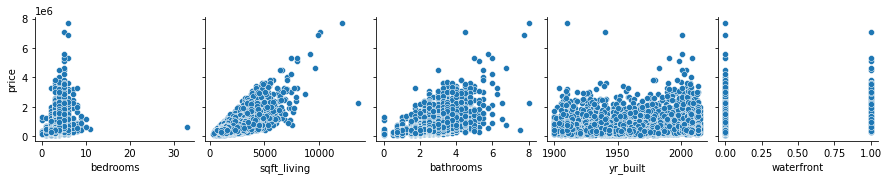

In [11]:
import seaborn as sb
sb.pairplot(dataFrame,
            x_vars=["bedrooms","sqft_living","bathrooms","yr_built","waterfront"],
            y_vars=["price"]
            )

PRIMEIRO VAMOS GERAR UM REGRESSÃO LINEAR SIMPLES, que utiliza apenas uma variável.
Passo 5: separar a variável idenpendente da dependente.

In [12]:
#variável INDEPENDENTE
X = dataFrame[["sqft_living"]]
#X

#variável DEPENDENTE
y = dataFrame[["price"]]
#y

Passo 6: separar dados de teste e de treinamento.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
print("Quantidade de registros separados para treinamento:",len(X_train))
print("Quantidade de registros separados para teste:", len(X_test))

Quantidade de registros separados para treinamento: 18371
Quantidade de registros separados para teste: 3242


Passo 7: aplicar a regressão linear. A primeira coisa a fazer ´importar a biblioteca que possui o algoritmo que fará o treinamento.

In [14]:
from sklearn.linear_model import LinearRegression
objRL = LinearRegression()

Passo 8: agora que temos um objeto apto a aplicar Regressão Linear, vamos partir para o treinamento do modelo.

In [15]:
objRL.fit(X_train,y_train)

LinearRegression()

Passo 9: vamos pedir para o objR prever o preço de casas com metragens que passarmos.

In [16]:
data = [
        [1181],
        [2575],
        [775],
        [450]
]

objRL.predict(data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[291101.5737291 ],
       [678450.7065947 ],
       [178286.83345404],
       [ 87979.46747031]])

Passo 10: A pergunta que não quer calar: cadê o gráfico gerado pelo objRL?
Vamos pedir para o Python mostrar como ficou o gráfico de regressão linear gerado.

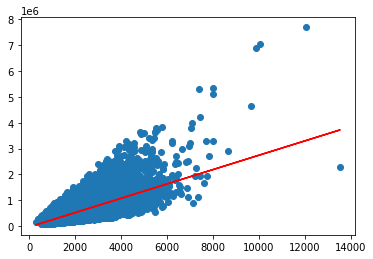

In [17]:
y_pred = objRL.predict(X_train)

import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color="red")

Passo 11: vamos medir a acurácia do modelo. Na estatística, no caso de Regressão linear, há dois indicadores muito utilizados: o MSE e o R2.
Devemos bucar o menor MSE possível e o R2 o mais próximo de 1 possível.
Estatísticos defendem que modelos com R2 acima de 0.7 são bons.

In [18]:
y_pred_test = objRL.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test,y_pred_test))
print("R2:", r2_score(y_test,y_pred_test))

MSE: 70979785423.95543
R2: 0.5043443601987108


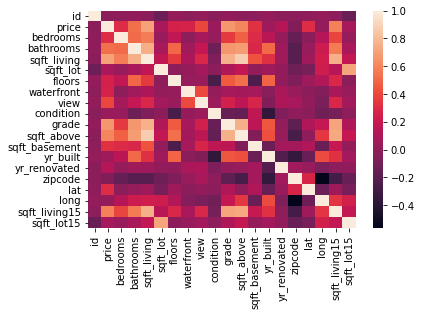

In [19]:
sb.heatmap(dataFrame.corr())

Passo 12: aprendemos acima como gerar uma regressão linear simples, que utiliza apenas uma variável independente para deduzir o valor da dependente.

Agora vamos tentar melhorar o modelo utilizando três variáveis independentes para prever o preço. No caso vamos utilizar: sqft_living, grade e bathrooms

In [20]:
X2 = dataFrame[["sqft_living","grade","bathrooms"]]
y2 = dataFrame[["price"]]
X2

,sqft_living,grade,bathrooms
0,1180,7,1.00
1,2570,7,2.25
2,770,6,1.00
3,1960,7,3.00
4,1680,8,2.00
...,...,...,...
21608,1530,8,2.50
21609,2310,8,2.50
21610,1020,7,0.75
21611,1600,8,2.50


Passo 13: uma vez que as variáveis independentes e dependentes foram definidas, vamos separar dados para teste e treinamento, para evitarmos o overfitting.

In [21]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.15)
print("Quantidade de dados separados para treinamento:", len(X2_train))
print("Quantidade de dados separados para teste", len(X2_test))

Quantidade de dados separados para treinamento: 18371
Quantidade de dados separados para teste 3242


Passo 14: agora que os dados de treinamento e de teste foram separados, vamos treinar o modelo.

In [22]:
from sklearn.linear_model import LinearRegression
objRL2 = LinearRegression()
objRL2.fit(X2_train,y2_train)

LinearRegression()

Passo 15: uma veza que o modelo foir treinado, vamos medir a sua acurácia.

In [23]:
y2_pred_test = objRL2.predict(X2_test)
y2_pred_test

from sklearn.metrics import r2_score, mean_squared_error
print("R2:", r2_score(y2_test,y2_pred_test))
print("MSE:", mean_squared_error(y2_test,y2_pred_test))

R2: 0.5391648872973497
MSE: 63703748658.43862


Passo final
Recaptulando: primeiro, geramos uma regressão utilizando apenas UMA variável INDEPENDENTE. Depois, geramos uma regressão com TRÊS variáveis independentes.
Agora vamos gerar um modelo com o máximo de variáveis independentes.

In [24]:
#Variáveis independentes
X3 = dataFrame.drop(columns=["id","date","price"])

#Variável dependente
y3 = dataFrame[["price"]]

In [25]:
from sklearn.model_selection import train_test_split
X3_train,X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.15)
print("Quantidade de registros separados para treinamento:", len(X3_train))
print("Quantidade de registros separados para teste:", len(X3_test))

Quantidade de registros separados para treinamento: 18371
Quantidade de registros separados para teste: 3242


In [26]:
from sklearn.linear_model import LinearRegression
objRL3 = LinearRegression()
objRL3.fit(X3_train,y3_train)

LinearRegression()

In [27]:
y3_pred_test = objRL3.predict(X3_test)
print("R2:", r2_score(y3_test,y3_pred_test))
print("MSE:",mean_squared_error(y3_test,y3_pred_test))
                      

R2: 0.6859363988783334
MSE: 48720592178.44421
